In [43]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
sys.path.extend([str(Path(os.getcwd()).parent),str(Path(os.getcwd()).parent.parent)])
ROOT = str(Path(os.getcwd()).parent)
import torchaudio
from project.data_loader.data_loaders import MySoundFolder
from project.data_loader.transforms import PIPELINES

Load data from raw data. Sub folders are considered as a label. 

In [44]:
items=MySoundFolder(root=str(Path(ROOT,"data","raw_data")),loader=torchaudio.load)


In [45]:
#utilities
import torch
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def print_stats(waveform, sample_rate=None):
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):

  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)
    
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)
    
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

Let's consider the first item, an original one. 
waveform represents amplitude, a measure of physical effect of pressure of sound. 

Sample Rate: 44100
Shape: (1, 153374)
Dtype: torch.float32
 - Max:      0.635
 - Min:     -0.708
 - Mean:    -0.000
 - Std Dev:  0.091

tensor([[ 1.4928e-03,  9.5765e-04,  5.3146e-04,  ..., -9.5740e-07,
         -3.9767e-07,  0.0000e+00]])



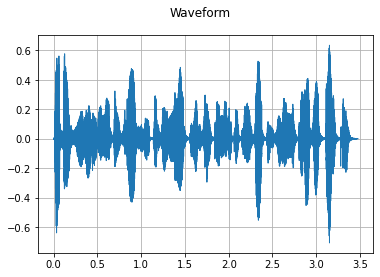

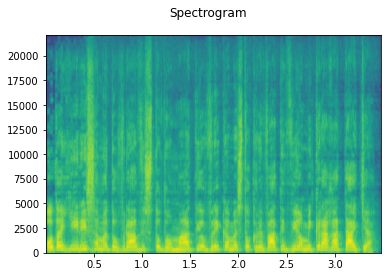

In [46]:
item = items[0]
sample= item[0]
waveform = sample[0]
sample_rate = sample[1]
label =sample[1]
print_stats(waveform, sample_rate=sample_rate)

plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)


Let's consider the second item, 0.9 tone above

Sample Rate: 46453
Shape: (1, 161558)
Dtype: torch.float32
 - Max:      0.635
 - Min:     -0.708
 - Mean:    -0.000
 - Std Dev:  0.090

tensor([[0.0015, 0.0010, 0.0005,  ..., 0.0000, 0.0000, 0.0000]])



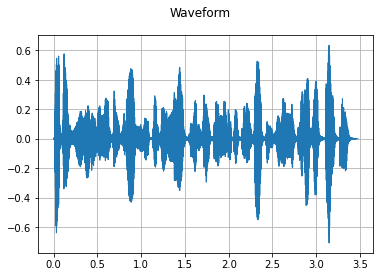

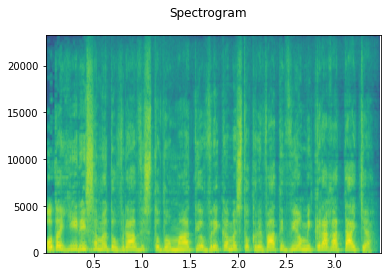

In [47]:
item = items[1]
sample= item[0]
waveform = sample[0]
sample_rate = sample[1]
label =sample[1]
print_stats(waveform, sample_rate=sample_rate)

plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)

Let's consider the third item, 0.9 tone below

Sample Rate: 41866
Shape: (1, 145605)
Dtype: torch.float32
 - Max:      0.635
 - Min:     -0.708
 - Mean:    -0.000
 - Std Dev:  0.091

tensor([[1.4927e-03, 9.5767e-04, 5.3144e-04,  ..., 1.4186e-05, 1.8656e-05,
         4.7624e-05]])



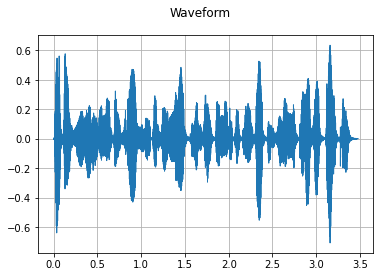

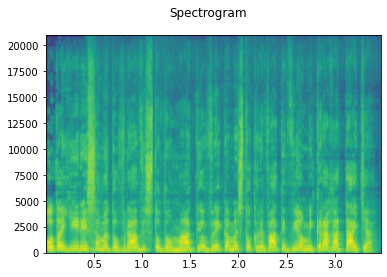

In [48]:
item = items[2]
sample= item[0]
waveform = sample[0]
sample_rate = sample[1]
label =sample[1]
print_stats(waveform, sample_rate=sample_rate)

plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)